# Prueba 3 - Distribución de Probabilidades

> Estudiante: Eduardo Zhizhpon <br/>
> Fecha: 03/07/2022

## Enunciado

Escoger algún tipo de función de trasformación inversa y ponerlo en práctica utilizando Python.
- Problema 1 pts
- Simulación 2 pts
- Gráficas/Resultados 2 pts

Se distribuye las funciones con base en el orden de lista, con 100 números de ejemplos.

**Fecha presentación:** 03/07/22 23:55

Para ello, usar el orden de las siguientes fórmulas y relacionarlas al orden de la lista del curso.

<img src="./formulas.png" alt="Fórmulas para la Distribución">

> **Fórmula asignada:** #2 - Cauchy

In [18]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

class Cauchy:
    
    n_round = 3
    
    def __init__(self):
        pass
        
    def __get_random(self):
        return random.random()
    
    def __density(self, x):
        return 1 / (math.pi * (1 + x**2))
    
    def __f(self, x):
        return ( (1 / 2) + ( math.atan(x) / math.pi) )
    
    def __f_inv(self):
        u = self.__get_random()
        x = math.tan( math.pi * ( u - ( 1 / 2)) )
        return x, u
    
    def pdf(self, x):
        """Probability Density Function"""
        n = len(x)
        x_result = np.arange(n, dtype=float)
        for i in range(n):
            x_result[i] = self.__density(x[i])
        return x_result
    
    def cdf(self, x):
        """Cumulative Distribution Function"""
        n = len(x)
        x_result = np.arange(n, dtype=float)
        for i in range(n):
            x_result[i] = self.__f(x[i])
        return x_result
    
    def rvs(self, samples=100, seed=None, r_print=False):
        """Random Variates by Size"""
        random.seed(seed)
        x_result = np.arange(samples, dtype=float)
        for i in range(samples):
            xi, ri = self.__f_inv()
            x_result[i] = xi
            if r_print:
                print(i+1, '\t' + str(round(ri, self.n_round)), 
                  '\t' + str(round(xi, self.n_round)))
        return x_result

cauchy = Cauchy()

## A. Problema

La distribución de cauchy pertenece a la familia de distribuciones de probabilidad continuas. Esta distribución se usa comúnmente en el campo de la Física por sus parámetros de ubicación y escala. Además, no tiene media, varianza o momentos superiores definidos.

**Planteamiento del problema**

Las distribuciones de Cauchy pueden usarse para modelar VaR (valor en riesgo). El VaR permite determinar la pérdida máxima que puede tener una inversión dentro de un horizonte temporal, dado un nivel de confianza (1- $\alpha$), normalmente 95% o 99%. A continuación, se realizará una simulación del VaR durante 100 meses.

## B. Simulación

In [52]:
sample = 100
print('Mes', '\t ri', '\t VaR')
cauchy_values = cauchy.rvs(samples=sample, seed=18, r_print=True)

Mes 	 ri 	 VaR
1 	0.181 	-1.562
2 	0.661 	0.556
3 	0.335 	-0.572
4 	0.198 	-1.395
5 	0.49 	-0.033
6 	0.494 	-0.019
7 	0.48 	-0.064
8 	0.458 	-0.132
9 	0.265 	-0.913
10 	0.254 	-0.976
11 	0.692 	0.688
12 	0.324 	-0.615
13 	0.675 	0.612
14 	0.787 	1.266
15 	0.866 	2.232
16 	0.944 	5.628
17 	0.235 	-1.102
18 	0.237 	-1.082
19 	0.735 	0.909
20 	0.576 	0.242
21 	0.202 	-1.36
22 	0.678 	0.624
23 	0.873 	2.377
24 	0.836 	1.763
25 	0.216 	-1.239
26 	0.299 	-0.732
27 	0.007 	-47.766
28 	0.976 	13.063
29 	0.22 	-1.205
30 	0.727 	0.866
31 	0.538 	0.12
32 	0.593 	0.302
33 	0.527 	0.084
34 	0.826 	1.638
35 	0.6 	0.325
36 	0.303 	-0.711
37 	0.115 	-2.651
38 	0.477 	-0.071
39 	0.923 	4.05
40 	0.145 	-2.038
41 	0.684 	0.652
42 	0.631 	0.437
43 	0.16 	-1.815
44 	0.207 	-1.316
45 	0.686 	0.662
46 	0.437 	-0.201
47 	0.407 	-0.301
48 	0.48 	-0.062
49 	0.101 	-3.038
50 	0.705 	0.749
51 	0.588 	0.285
52 	0.534 	0.108
53 	0.34 	-0.551
54 	0.812 	1.487
55 	0.824 	1.62
56 	0.545 	0.142
57 	0.089 	-3.496
58 	0.

## C. Gráficas y Resultados

**Gráfica de Función de densidad**

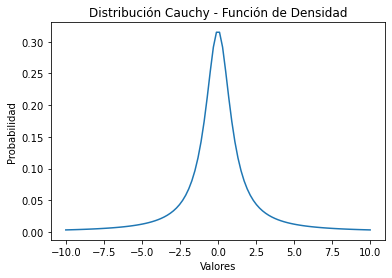

In [55]:
x = np.linspace(-10, 10, samples)
cauchy_values_pdf = cauchy.pdf(x)
plt.plot(x, cauchy_values_pdf)
plt.title('Distribución Cauchy - Función de Densidad')
plt.ylabel('Probabilidad')
plt.xlabel('Valores')
plt.show()

**Gráfica de Función de probabilidad acumulada**

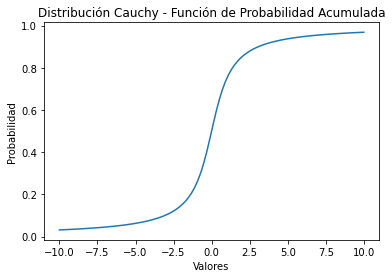

In [54]:
x = np.linspace(-10, 10, samples)
cauchy_values_cdf = cauchy.cdf(x)
plt.plot(x, cauchy_values_cdf)
plt.title('Distribución Cauchy - Función de Probabilidad Acumulada')
plt.ylabel('Probabilidad')
plt.xlabel('Valores')
plt.show()

**Histograma**

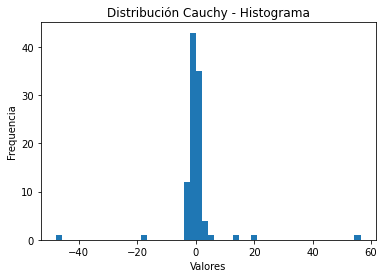

In [53]:
plt.hist(cauchy_values, 50)
plt.title('Distribución Cauchy - Histograma')
plt.ylabel('Frequencia')
plt.xlabel('Valores')
plt.show()

**Referencias**

Servizo Galeo de Saúde, Repositorio (2014). Distribuciones de Probabilidad. Sergas ES. https://www.sergas.es/Saude-publica/Documents/1927/4-Ayuda%20Distribuciones%20de%20probabilidad.pdf

Stevens, R. (2021, October 5). Valor en riesgo (VAR): cálculo y ejemplos. Rankia. https://www.rankia.co/blog/analisis-colcap/3606512-valor-riesgo-var-calculo-ejemplos